# Predicting the Sale price of bulldozers using machine learning

In this notebook we will be going through the Kaggle competition dataset on the Blue Book of Bulldozers with the goal of predicting the sale price of bulldozers

## 1. Problem definition
* How well in the future can we predict the future sale price of a bulldozer given its features and previous sale history

## 2. Data
https://www.kaggle.com/c/bluebook-for-bulldozers/data
https://www.kaggle.com/datasets/farhanreynaldo/blue-book-for-bulldozer
* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.


## 3. Evaluation
* metrics: RMSLE (root mean squared log error)

## 4. Features
* see data dictionary

In [1]:
import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import training and validation sets
df = pd.read_csv("TrainAndValid.csv",
                low_memory = False)

In [3]:
df.shape

(412698, 53)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [5]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

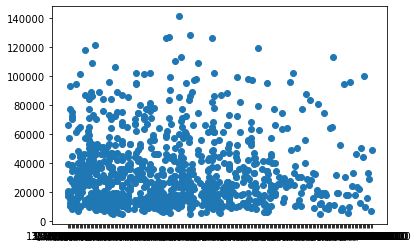

In [6]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000]);

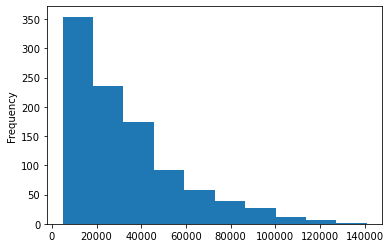

In [7]:
df["SalePrice"][:1000].plot(kind="hist");

### parsing dates

When working with time series data, we want to enrich the time and date component as much as possible. 
We can do this by telling pandas which of our columns has dataes in it using "parse_dates" function

In [8]:
# import data again but this time parse dates
df = pd.read_csv("TrainAndValid.csv",
                low_memory = False,
                parse_dates = ["saledate"])

In [9]:
df.dtypes

SalesID                              int64
SalePrice                          float64
MachineID                            int64
ModelID                              int64
datasource                           int64
auctioneerID                       float64
YearMade                             int64
MachineHoursCurrentMeter           float64
UsageBand                           object
saledate                    datetime64[ns]
fiModelDesc                         object
fiBaseModel                         object
fiSecondaryDesc                     object
fiModelSeries                       object
fiModelDescriptor                   object
ProductSize                         object
fiProductClassDesc                  object
state                               object
ProductGroup                        object
ProductGroupDesc                    object
Drive_System                        object
Enclosure                           object
Forks                               object
Pad_Type   

In [10]:
df["saledate"][:10]

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
5   2008-12-18
6   2004-08-26
7   2005-11-17
8   2009-08-27
9   2007-08-09
Name: saledate, dtype: datetime64[ns]

In [11]:
df["saledate"].dtype

dtype('<M8[ns]')

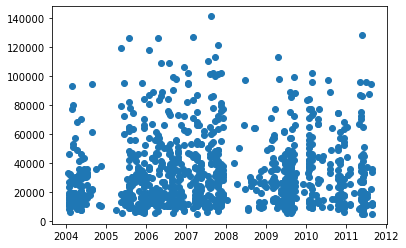

In [12]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000]);

In [13]:
df.shape

(412698, 53)

In [14]:
df["saledate"].head(10)
# we can see the saledate column is not in order

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
5   2008-12-18
6   2004-08-26
7   2005-11-17
8   2009-08-27
9   2007-08-09
Name: saledate, dtype: datetime64[ns]

### sort dataframe by date

When working with timeseries data it is a good idea to sort it by date

In [15]:
# sort dataframe in date order
df.sort_values(by=["saledate"],inplace=True,ascending=True)

df["saledate"].head(10)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
Name: saledate, dtype: datetime64[ns]

### make a copy of the original DataFrame

Making a copy of the original dataframe so that we can alter/manipulate the dataframe without altering the original unaltered dataframe

In [16]:
# make a copy
df_temp= df.copy()

### add datetime parameters for "saledate" column

In [17]:
df_temp["saleYear"] = df_temp["saledate"].dt.year

df_temp["saleMonth"] = df_temp["saledate"].dt.month

df_temp["saleDay"] = df_temp["saledate"].dt.day

df_temp["saleDayofWeek"] = df_temp["saledate"].dt.dayofweek

df_temp["saleDayOfYear"] = df_temp["saledate"].dt.dayofyear

In [18]:
df_temp.head(5).T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [19]:
# now we've enriched our DataFrame with date time features we can remove saledate
df_temp.drop("saledate",axis=1,inplace=True)

In [20]:
df_temp["state"].value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

## 5. Modelling

we've done some EDA and feature engineering so lets do some model driven EDA

In [21]:
df_temp.shape

(412698, 57)

In [22]:
# lets create a machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1,
                             random_state=42)

model.fit(df_temp.drop("SalePrice",axis=1),df_temp["SalePrice"])

ValueError: could not convert string to float: 'Low'

we have non-number data as well as nan data so our models will not run. See below

In [23]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-nul

In [24]:
df_temp["UsageBand"].dtype

dtype('O')

In [25]:
df_temp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

### One way to convert strings to numbers

One way to turn strings to numbers is by converting them into pandas categories

In [26]:
pd.api.types.is_string_dtype(df_temp["UsageBand"])

True

In [27]:
# find the columns which contain strings
for label,content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [28]:
# if youre wondering what df.items() does, heres an example
random_dict={"key1":"hello",
            "key2":"world!"}

for key,value in random_dict.items():
    print(f"this is a key: {key}",
         f"this is a value: {value}")

this is a key: key1 this is a value: hello
this is a key: key2 this is a value: world!


In [29]:
# this will turn all of the string value intocategory values
for label,content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        df_temp[label]=content.astype("category").cat.as_ordered()
    

In [30]:
df_temp.info() # you can see the dtypes are now categories instead of objects

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [31]:
df_temp["state"].cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [32]:
df_temp["state"].cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

thanks to pandas categories we now have a way to access all of our data in the form of numbers

but we still have a bunch of missing data

In [33]:
# check missing data
df_temp.isnull().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

### save preprocessed df_temp as csv

In [34]:
# export current temp as csv
#df_temp.to_csv = ("insert file name.csv",index=False)

## fill missing values

### fill numerical missing values first

In [35]:
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayofWeek
saleDayOfYear


In [36]:
df_temp.ModelID.dtype

dtype('int64')

In [37]:
# check for which numeric columns have null values
for label,content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [38]:
# #fill numeric rows with median
for label,content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # add a indary column which tells us if the data was missing
            df_temp[label+"_is_missing"] = pd.isnull(content)
            #fill missing numeric values with median
            df_temp[label]=content.fillna(content.median()) #we use median as median is more robust to outliers

In [39]:
# check for which numeric columns have null values after what we just did
for label,content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

great!! our numeric column have no missing/NaN values

In [40]:
# check to see how many examples were missing
df_temp.auctioneerID_is_missing.value_counts()

False    392562
True      20136
Name: auctioneerID_is_missing, dtype: int64

In [41]:
df_temp.isna().sum()

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              339028
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        140727
fiModelSeries                          354031
fiModelDescriptor                      337882
ProductSize                            216605
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           305611
Enclosure                                 334
Forks                             

### filling and turning categorical variables into numbers

In [42]:
# check for column which arent numeric
for label,content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [43]:
# turn categorical variables into numbers and fill missing
for label,content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # add a binary column to indictate whther sample had missing value
        df_temp[label+"_is_missing"] = pd.isnull(content)
        #turn categories into numbers and add +1
        df_temp[label] = pd.Categorical(content).codes+1

In [44]:
pd.Categorical(df_temp["state"]).codes

array([43,  8,  8, ...,  4,  4,  4], dtype=int8)

In [45]:
df_temp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


In [46]:
df_temp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

In [47]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 81.1 MB


In [48]:
%%time
#instatiate the model

# we can create a randomforerstregressor with n_jobs=-1, random_state=42 however this will take
# a long time as there are 412698 entries in this data
#model = RandomForestRegressor(n_jobs=-1,random_state=42)
#X = df_temp.drop("SalePrice",axis=1)
#y = df_temp["SalePrice"]

#from sklearn.model_selection import train_test_split
#Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2)


CPU times: total: 0 ns
Wall time: 0 ns


### splitting data into train/validation sets

everything before 2012 is train, everything in 2012

In [49]:
df_temp["saleYear"]

205615    1989
274835    1989
141296    1989
212552    1989
62755     1989
          ... 
410879    2012
412476    2012
411927    2012
407124    2012
409203    2012
Name: saleYear, Length: 412698, dtype: int64

In [50]:
df_temp["saleYear"].value_counts()

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: saleYear, dtype: int64

In [51]:
# splitting the data into train/validation sets
df_val = df_temp[df_temp.saleYear==2012]
df_train = df_temp[df_temp.saleYear!=2012]

df_val.shape, df_train.shape

((11573, 103), (401125, 103))

In [52]:
# take the val and train dfs and split into X and y
Xtrain, ytrain = df_train.drop("SalePrice",axis=1),df_train["SalePrice"]
Xval, yval = df_val.drop("SalePrice",axis=1), df_val["SalePrice"]

In [53]:
Xtrain.shape, ytrain.shape, Xval.shape, yval.shape

((401125, 102), (401125,), (11573, 102), (11573,))

Our required evaluation function for this Kaggle problem is RMSLE

### Building an evaluation function

In [63]:
# Create an evaluation function - will create one for RMSLE
from sklearn.metrics import mean_squared_log_error, mean_absolute_error,r2_score

def rmsle(y_test,y_preds):
    '''
    calculates the rmsle between the predictions and true labels
    '''
    
    return np.sqrt(mean_squared_log_error(y_test,y_preds))

# create a function to evaluate a model ona  few different levels
def show_scores(model):
    train_preds = model.predict(Xtrain)
    val_preds = model.predict(Xval)
    scores = {"Training MAE":mean_absolute_error(ytrain,train_preds),
             "Valid MAE":mean_absolute_error(yval,val_preds),
             "Training RMSLE": rmsle(ytrain,train_preds),
             "Valid RMSLE": rmsle(yval,val_preds),
             "Training R^2": r2_score(ytrain,train_preds),
             "Valid R^2": r2_score(yval,val_preds)}
    return scores

## testing our model ona  subset (to tune the hyperparameters)

In [56]:
## this takes far too long for experimenting because the dataframe is very large


#model = RandomForestRegressor(n_jobs=-1, random_state=42)

#model.fit(Xtrain,ytrain)


In [59]:
# we can change max_samples value because if we leave n_estimators=100 then each 
# estimator will look at 1000 data points instead of nearly 40000 data instances. this will imporve training time
model = RandomForestRegressor(n_jobs=-1, random_state=42, max_samples=10000)

model.fit(Xtrain,ytrain)

RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [64]:
show_scores(model)

{'Training MAE': 5561.2988092240585,
 'Valid MAE': 7177.26365505919,
 'Training RMSLE': 0.257745378256977,
 'Valid RMSLE': 0.29362638671089003,
 'Training R^2': 0.8606658995199189,
 'Valid R^2': 0.8320374995090507}

### Hyperparameter tuning with randomizedsearchcv

In [65]:
from sklearn.model_selection import RandomizedSearchCV

rf_grid = {"n_estimators":np.arange(10,100,10),
          "max_depth":[None,3,5,10],
          "min_samples_split":np.arange(2,20,2),
          "min_samples_leaf": np.arange(1,20,2),
          "max_features":[0.5,1,"sqrt","auto"],
          "max_samples":[10000]}

rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,random_state=42),
                             param_distributions=rf_grid,
                             n_iter=2,
                             cv=5,verbose=True)

rs_model.fit(Xtrain,ytrain)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [68]:
#find the best hyperparameters from the randomized search cv
rs_model.best_params_

{'n_estimators': 40,
 'min_samples_split': 6,
 'min_samples_leaf': 5,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': 10}

In [69]:
# evaluate the randomizedsearchcv model
show_scores(rs_model)

{'Training MAE': 6524.774896494135,
 'Valid MAE': 7902.986766185876,
 'Training RMSLE': 0.29273692234661247,
 'Valid RMSLE': 0.3160421057982448,
 'Training R^2': 0.8143243106282217,
 'Valid R^2': 0.793432440352654}

### train a model with the best hyperparameters

**note:** these were found after 100 iterations (n_iter=100) of randomizedsearchcv

In [73]:
%%time
#most ideal model hyperparameters
ideal_model=RandomForestRegressor(n_estimators=40,
                                 min_samples_leaf=1,
                                 min_samples_split=14,
                                 max_features=0.5,
                                 n_jobs=-1,
                                 max_samples=None,
                                 random_state=42)

ideal_model.fit(Xtrain,ytrain)

CPU times: total: 7min 15s
Wall time: 1min 17s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1)

In [75]:
# show scores for rs model trained on all the data
show_scores(rs_model)

{'Training MAE': 6524.774896494134,
 'Valid MAE': 7902.986766185876,
 'Training RMSLE': 0.29273692234661247,
 'Valid RMSLE': 0.3160421057982448,
 'Training R^2': 0.8143243106282217,
 'Valid R^2': 0.793432440352654}

In [74]:
# show scores for ideal model trained on all the data
show_scores(ideal_model)

{'Training MAE': 2952.59939516687,
 'Valid MAE': 5957.490624401525,
 'Training RMSLE': 0.1446118724854853,
 'Valid RMSLE': 0.2464695065278897,
 'Training R^2': 0.9589812601870172,
 'Valid R^2': 0.8819998344854344}

## make predictions on the test data

In [143]:
# import the test data
df_test = pd.read_csv("Test.csv",
                     low_memory=False,
                     parse_dates=["saledate"])

df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [144]:
df_test.saledate

0       2012-05-03
1       2012-05-10
2       2012-05-10
3       2012-05-10
4       2012-05-10
           ...    
12452   2012-10-24
12453   2012-10-24
12454   2012-10-24
12455   2012-10-24
12456   2012-09-19
Name: saledate, Length: 12457, dtype: datetime64[ns]

In [145]:
# make predictions on the test dataset



#test_preds = ideal_model.predict(df_test)



# we can not just predict on the test dataset as the test dataset has the same missing 
# values/string values as the training dataset
#df_test.isna().sum()

In [146]:
#df_test.info()

In [147]:
df_test["saledate"]

0       2012-05-03
1       2012-05-10
2       2012-05-10
3       2012-05-10
4       2012-05-10
           ...    
12452   2012-10-24
12453   2012-10-24
12454   2012-10-24
12455   2012-10-24
12456   2012-09-19
Name: saledate, Length: 12457, dtype: datetime64[ns]

### preprocessing the test data so that its the same format as train/valid dataset

In [129]:
'''
def preprocess_data(df):
    '''
    #performs transformations on df so that its ready to be valuated
    '''
    df["saleYear"] = df["saledate"].dt.year

    df["saleMonth"] = df["saledate"].dt.month

    df["saleDay"] = df["saledate"].dt.day

    df["saleDayofWeek"] = df["saledate"].dt.dayofweek

    df["saleDayOfYear"] = df["saledate"].dt.dayofyear
    
    df.drop("saledate",axis=1,inplace=True)
    
    # fill the numeric rows with median
    for label,content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # add a indary column which tells us if the data was missing
                df[label+"_is_missing"] = pd.isnull(content)
                #fill missing numeric values with median
                df[label]=content.fillna(content.median()) #we use median as median is more robust to outliers
    
            # fill categorical missing data and turn categories into numbers
            if not pd.api.types.is_numeric_dtype(content):
                df[label+"_is_missing"] = pd.isnull(content)
                #we add +1 to the category code because pandas encodes missing categories
                df[label] = pd.Categorical(content).codes+1

    return df
'''

IndentationError: unexpected indent (2985017007.py, line 5)

In [148]:
def preprocess_data(df):
    """
    Performs transformations on df and returns transformed df.
    """
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayofWeek"] = df.saledate.dt.dayofweek
    df["saleDayOfYear"] = df.saledate.dt.dayofyear
    
    df.drop("saledate", axis=1, inplace=True)
    
    # Fill the numeric rows with median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Add a binary column which tells us if the data was missing or not
                df[label+"_is_missing"] = pd.isnull(content)
                # Fill missing numeric values with median
                df[label] = content.fillna(content.median())
    
        # Filled categorical missing data and turn categories into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"] = pd.isnull(content)
            # We add +1 to the category code because pandas encodes missing categories as -1
            df[label] = pd.Categorical(content).codes+1
    
    return df

In [149]:
# Process the test data 
df_test_preprocess = preprocess_data(df_test)
df_test_preprocess.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [150]:
df_test.isna().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 101, dtype: int64

In [151]:
Xtrain.head()

# there is a difference in the amount of columns between our xtrain and xtest preprocessed dataframe

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
205615,1646770,1126363,8434,132,18.0,1974,0.0,0,4593,1744,...,True,True,True,True,True,False,False,False,True,True
274835,1821514,1194089,10150,132,99.0,1980,0.0,0,1820,559,...,True,True,True,True,True,True,True,True,False,False
141296,1505138,1473654,4139,132,99.0,1978,0.0,0,2348,713,...,True,True,True,True,True,False,False,False,True,True
212552,1671174,1327630,8591,132,99.0,1980,0.0,0,1819,558,...,True,True,True,True,True,True,True,True,False,False
62755,1329056,1336053,4089,132,99.0,1984,0.0,0,2119,683,...,True,True,True,True,True,False,False,False,True,True


In [152]:
# lets check which columns are missing from df test preprocess dataframe that xtrain dataframe has

set(Xtrain.columns)-set(df_test_preprocess.columns)

{'auctioneerID_is_missing'}

In [153]:
df_test_preprocess["auctioneerID_is_missing"]=False
df_test_preprocess.head()

# finally our test data frame is in the same form as training dataframe

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


In [154]:
# make predictions on the test data
test_preds = ideal_model.predict(df_test_preprocess)

C:\Users\steph\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [156]:
# format predictions in the proper format for Kaggle
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test_preprocess["SalesID"]
df_preds["SalesPrice"] = test_preds
df_preds.head()

,SalesID,SalesPrice
0,1227829,18809.822273
1,1227844,20394.870531
2,1227847,46697.670779
3,1227848,64093.885174
4,1227863,49185.751692


### feature importance

feature importance seeks to figure out which different attributes of the data were most important when it comes to predicting the target variable (SalePrice)

In [160]:
# find feature importance of our best model
ideal_model.feature_importances_.shape

(102,)

In [161]:
Xtrain.shape

(401125, 102)

In [177]:
# helper function for plotting feature importance
def plot_features(columns,importances,n=20):
    df = (pd.DataFrame({"features":columns,
                       "feature_importances":importances}).sort_values("feature_importances",ascending=False).reset_index(drop=True))
    
    # plot the dataframe
    fig,ax=plt.subplots()
    fig.set_size_inches(10, 8)
    ax.barh(df["features"][:n],df["feature_importances"][:n])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature Importance")
    ax.set_title("Top 20 Feature importances")
    ax.invert_yaxis()

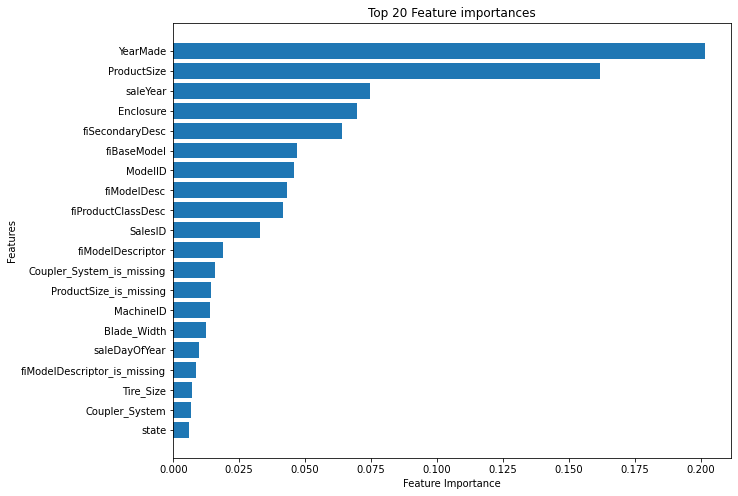

In [178]:
plot_features(Xtrain.columns,ideal_model.feature_importances_)